## Project Problem   Total Marks 100

### This data is collected on the companies listed in India on the Stock Exchange from the  https://www.moneycontrol.com/markets/indian-indices/. The data talks about the performance of the top 100 companies on the stock exchange. 
This data is about S&P BSE 100 on the Bombay Stock Exchange and is collected 0n 12/12/2020. The data is stored and provided to you in the file data_SP_BSE_100_20201212.xlsx format. 
The data can be read by pd.read_excel method on the pandas. Read the data and prform the exploratory analysis on this data. 


Your work will be judged on the basis of the type of questions it is able to provide answer to.
You have to submit your answer by updating this file only. Document your responses appropriately. Please change the name of the file by appending your role number to it.

PROJECT SUBMITTED BY:- GROUP 8

015015-ANIKET NANDY

015025-BISWADIP DAS

015041-SAKSHI JAISWAL

015042-SARTHAK KUMAR

015048-AMRIT PULKIT GAUTAM

015052-RAJAT CHAWLA


# Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

- Importing necessary libraries
- '%matplotlib inline' enables us to see plots without using plt.show() everytime

# Loading Dataset

In [108]:
df = pd.read_excel('data_SP.xlsx')
df.head()

,Company,LTP,%Change,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty
0,ABB India,1174.450,1.320,94460,1174.450,1175.000,1,10
1,ACC,1607.450,-1.500,55679,1607.450,1607.450,102,38
2,Adani Ports,466.250,-1.000,154710,465.050,466.250,30,48
3,Ambuja Cements,246.100,-0.910,610794,246.100,246.100,9,48
4,Apollo Hospital,2360.400,-1.340,30709,2360.400,2369.500,497,2


- Gets a glimpse of the data

# Data Insights

In [109]:
df.shape

(100, 8)

- Gives us the dimensions of data in rows and columns

In [110]:
df.columns.values 

array(['Company', 'LTP', '%Change', 'Volume', 'Buy Price', 'Sell Price',
       'Buy Qty', 'Sell Qty'], dtype=object)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     100 non-null    object 
 1   LTP         100 non-null    float64
 2   %Change     100 non-null    float64
 3   Volume      100 non-null    int64  
 4   Buy Price   100 non-null    float64
 5   Sell Price  100 non-null    float64
 6   Buy Qty     100 non-null    int64  
 7   Sell Qty    100 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 6.4+ KB


- Helps us see the data type along with the count of null values (which are not present here)

# Summary Statistics

In [114]:
#pd.options.display.float_format = '{:.2f}'.format
df['Volume'] = df['Volume'].astype('int64')
df.describe()

,LTP,%Change,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,2397.677,0.661,2238465.320,2390.952,2404.424,7858.010,1009.360
std,8355.313,1.879,13001681.850,8325.568,8401.233,43522.482,6527.436
min,10.110,-2.440,496.000,10.150,0.000,1.000,0.000
25%,189.675,-0.515,54897.500,189.475,189.500,4.000,8.250
50%,539.975,0.155,208305.500,536.750,539.925,25.000,41.000
75%,1547.537,1.355,880066.500,1533.000,1546.250,251.500,173.750
max,77866.600,9.940,129928357.000,77600.000,78300.000,299884.000,64391.000


# Data Visualization

- Correlation Matrix can be used to see if there is a correlation between the variables or the attributes
- Darker region maeans stronger correlation

## Correlation Matrix

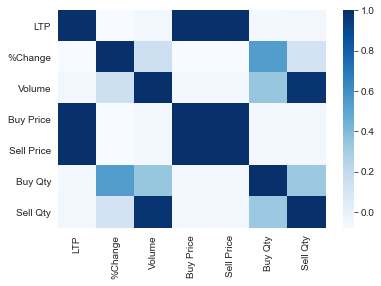

In [115]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

## Correlation Matrix with Values

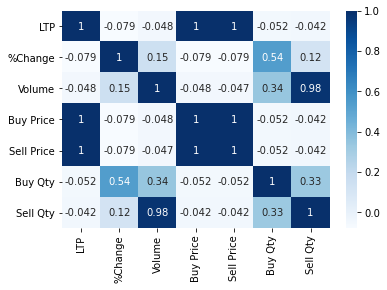

In [25]:
sns.heatmap(df.corr(),cmap='Blues',annot=T)

# Scatter Plot for attributes

In [47]:
x = df[['Volume']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized_volume = pd.DataFrame(x_scaled)
df['Volume'] = df_normalized_volume #Volume column was normalized to make it reader friendly

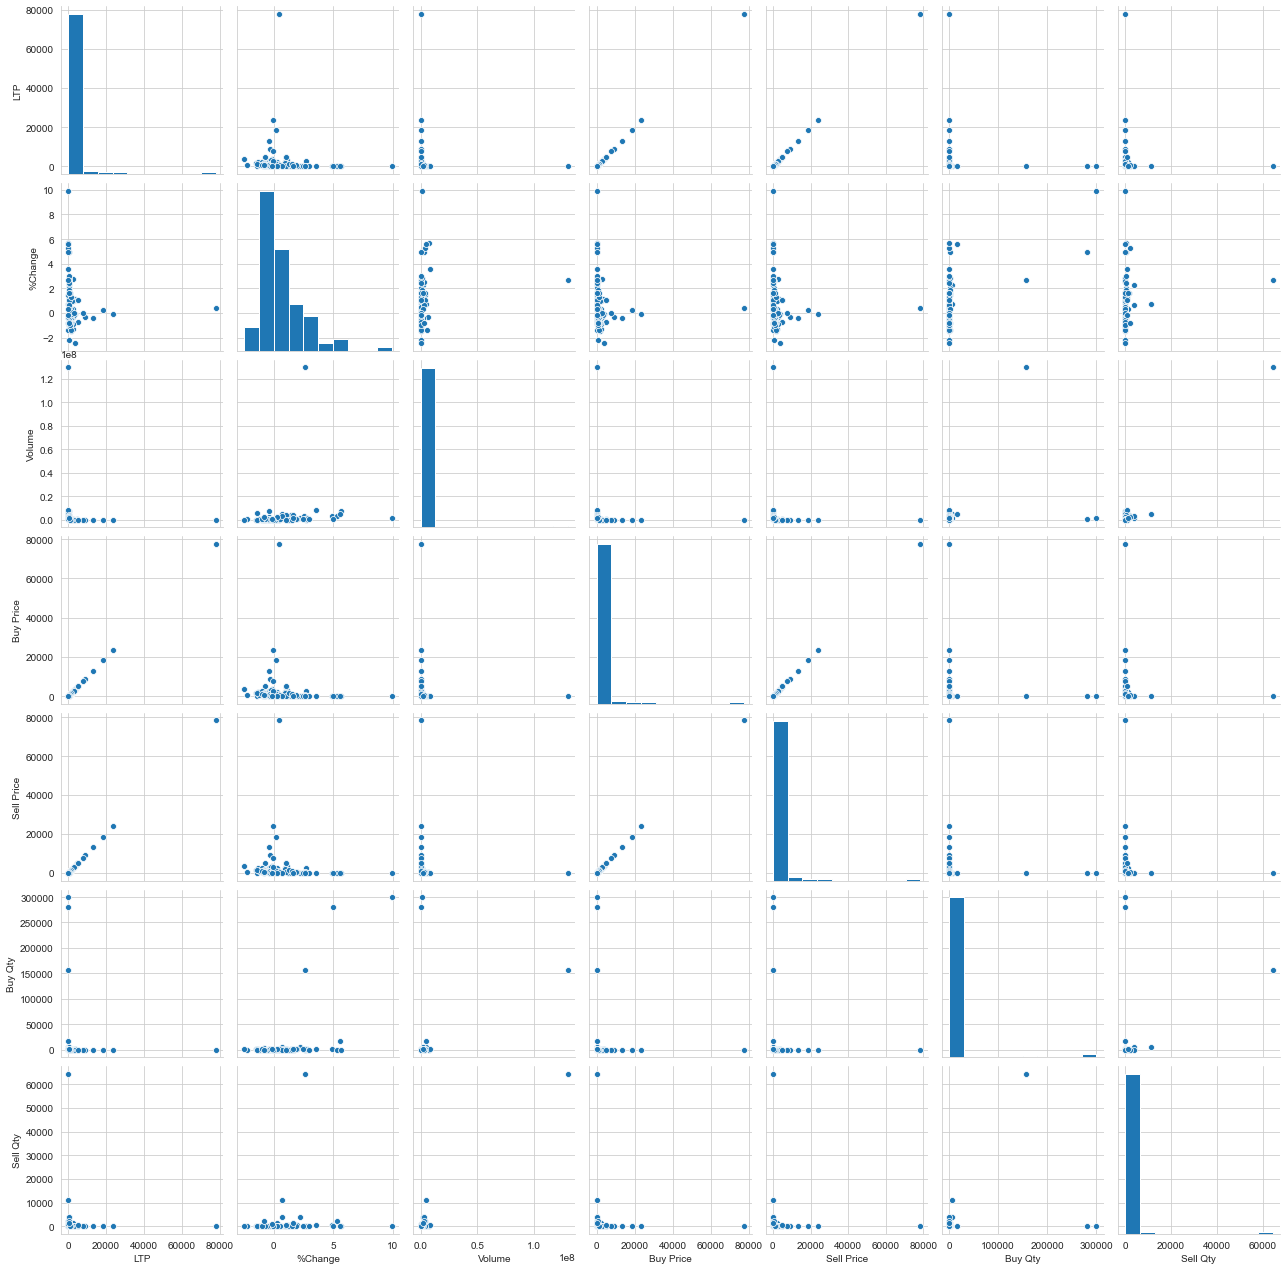

In [117]:
sns.pairplot(df) # Makes Scatter plots between all the numeric attributes

- Along with the Correlation Matrix, Scatter plots can also be used for insights regarding relationship between the attributes if any.

# Checking Outliers in the Column data

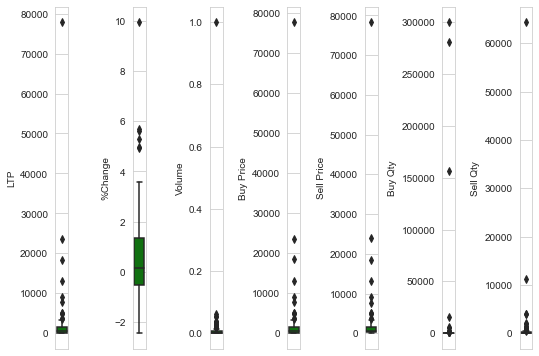

In [48]:
l = df.columns.values
number_of_columns=8
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

- Box-and-Whisker Plots have been used to show the distribution of data
- Every column has significant amount of outliers (with the least being in Change%)

# Distribution Skewness

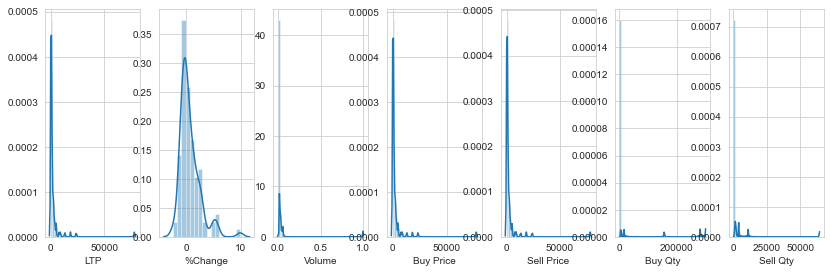

In [49]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

# Day's Biggest Movers  

### Top 15 Biggest Gainers (by % change)

In [82]:
df[['Company', '%Change','Volume','LTP']].sort_values('%Change', ascending=False).nlargest(15, '%Change')

,Company,%Change,Volume,LTP
79,Reliance Infra,9.94,1012981,28.75
69,ONGC,5.68,7143570,96.80
73,PNB,5.61,4594582,40.50
68,NTPC,5.30,3435453,102.40
77,Rel Capital,4.97,547805,12.68
35,GAIL,4.92,2802536,125.90
80,SAIL,3.59,8113246,57.75
76,REC,2.99,504801,136.15
67,NMDC,2.83,1050849,110.85
55,Jubilant Food,2.72,30891,2647.50


### Top 15 Biggest Losers (by % change)

In [67]:
df[['Company', '%Change','Volume','LTP']].sort_values('%Change', ascending=True).nsmallest(15, '%Change')

,Company,%Change,Volume,LTP
30,Divis Labs,-2.44,24560,3640.85
8,Axis Bank,-2.19,481870,613.30
1,ACC,-1.50,55679,1607.45
72,Piramal Enter,-1.41,40088,1433.65
12,Bank of Baroda,-1.36,5238335,65.45
4,Apollo Hospital,-1.34,30709,2360.40
60,M&M,-1.18,188125,727.35
2,Adani Ports,-1.00,154710,466.25
36,Glenmark,-0.96,59944,526.85
92,Tech Mahindra,-0.94,93925,919.00


# Share Prices

### Top 15 Most Expensive stocks

In [70]:
df[['Company','LTP', '%Change','Volume']].sort_values('LTP', ascending=False).nlargest(15, 'LTP')

,Company,LTP,%Change,Volume
65,MRF,77866.60,0.43,496
82,Shree Cements,23692.00,-0.06,570
66,Nestle,18403.00,0.22,5095
19,Bosch,13140.10,-0.40,2560
11,Bajaj Finserv,8998.65,-0.31,21381
63,Maruti Suzuki,7732.25,-0.03,15710
32,Dr Reddys Labs,5015.90,-0.71,20973
95,UltraTechCement,5013.45,1.05,22550
10,Bajaj Finance,4843.10,1.05,112161
21,Britannia,3734.30,-0.12,15183


### Top 15 Least Expensive Stocks

In [72]:
df[['Company','LTP', '%Change','Volume']].sort_values('LTP', ascending=False).nsmallest(15, 'LTP')

,Company,LTP,%Change,Volume
99,Vodafone Idea,10.11,2.64,129928357
77,Rel Capital,12.68,4.97,547805
79,Reliance Infra,28.75,9.94,1012981
17,BHEL,35.95,0.70,4712191
48,IDFC First Bank,37.45,-0.40,2400752
73,PNB,40.50,5.61,4594582
80,SAIL,57.75,3.59,8113246
12,Bank of Baroda,65.45,-1.36,5238335
89,Tata Power,72.80,0.28,2306227
94,TML-D,74.70,-0.13,252045


# Stock activity (by Volume)

### Top 10 Stocks with least activity

In [94]:
df[['Company','Volume','LTP', '%Change']].sort_values('Volume', ascending=False).nsmallest(10, 'Volume')

,Company,Volume,LTP,%Change
65,MRF,496,77866.60,0.43
82,Shree Cements,570,23692.00,-0.06
19,Bosch,2560,13140.10,-0.40
66,Nestle,5095,18403.00,0.22
9,Bajaj Auto,12183,3327.00,1.11
84,Siemens,12853,1538.25,0.09
21,Britannia,15183,3734.30,-0.12
63,Maruti Suzuki,15710,7732.25,-0.03
32,Dr Reddys Labs,20973,5015.90,-0.71
11,Bajaj Finserv,21381,8998.65,-0.31


### Top 10 Stocks with Most activity

In [93]:
df[['Company','Volume','LTP', '%Change']].sort_values('Volume', ascending=False).nlargest(10, 'Volume')

,Company,Volume,LTP,%Change
99,Vodafone Idea,129928357,10.11,2.64
80,SAIL,8113246,57.75,3.59
69,ONGC,7143570,96.80,5.68
16,Bharti Infratel,6928014,244.90,-0.37
12,Bank of Baroda,5238335,65.45,-1.36
17,BHEL,4712191,35.95,0.70
73,PNB,4594582,40.50,5.61
53,ITC,3893719,216.20,1.65
81,SBI,3745846,272.45,1.06
52,IOC,3583246,93.85,1.46


# Stocks Value (on that given day)

- A new column was created with the name 'Value' as VOLUME*LTP/10000
- VOLUME*LTP gives us the movement in value while it is divided by 10000 to make it easier to compare and read

### 10 Stocks with least traded value

In [92]:
df['Value']= df.Volume* df.LTP/10000
df[['Company','Volume','LTP', 'Value','%Change']].sort_values('Value', ascending=False).nsmallest(10, 'Value')

,Company,Volume,LTP,Value,%Change
77,Rel Capital,547805,12.68,694.616740,4.97
82,Shree Cements,570,23692.00,1350.444000,-0.06
94,TML-D,252045,74.70,1882.776150,-0.13
84,Siemens,12853,1538.25,1977.112725,0.09
28,Cummins,41504,583.50,2421.758400,0.29
22,Cadila Health,56672,466.70,2644.882240,-0.53
38,Grasim,31393,902.10,2831.962530,-0.85
79,Reliance Infra,1012981,28.75,2912.320375,9.94
49,IGL,65467,482.15,3156.491405,0.09
36,Glenmark,59944,526.85,3158.149640,-0.96


### 10 Stocks with most traded value

In [91]:
df[['Company','Volume','LTP', 'Value','%Change']].sort_values('Value', ascending=False).nlargest(10, 'Value')

,Company,Volume,LTP,Value,%Change
41,HDFC,870878,2296.10,199962.297580,0.28
16,Bharti Infratel,6928014,244.90,169667.062860,-0.37
78,Reliance,689028,2005.60,138191.455680,-0.08
99,Vodafone Idea,129928357,10.11,131357.568927,2.64
97,UPL,2572557,434.80,111854.778360,-0.83
81,SBI,3745846,272.45,102055.574270,1.06
53,ITC,3893719,216.20,84182.204780,1.65
69,ONGC,7143570,96.80,69149.757600,5.68
47,ICICI Bank,1201141,515.20,61882.784320,1.63
42,HDFC Bank,432604,1382.20,59794.524880,-0.26
